In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import os
import struct
from PIL import Image

#### Contents of logical record (2052 bytes)

```
 --------------------------------------------------------------------------------------------
|             |Number|        |                                                              |
|     Byte    |  of  |  Type  |            Contents of Logical Record                        |
|   Position  | Bytes|        |                                                              |
|============================================================================================|
|    1 -    2 |    2 | Integer| Data Number (greater than or equal to 1)                     |
|    3 -    4 |    2 | ASCII  | Character Code ( ex. "0 ", "A ", "$ ", " A", "KA" )          |
|    5 -    6 |    2 | Integer| Serial Sheet Number (greater than or equal to 0)             |
|I   7        |    1 | Binary | JIS Code (JIS X 0201)                                        |
|D   8        |    1 | Binary | EBCDIC Code                                                  |
|    9        |    1 | Integer| Evaluation of Individual Character Image (0=clean, 1, 2, 3)  |
|P  10        |    1 | Integer| Evaluation of Character Group (0=clean, 1, 2)                |
|a  11        |    1 | Integer| Male-Female Code ( 1=male, 2=female ) (JIS X 0303)           |
|r  12        |    1 | Integer| Age of Writer                                                |
|t  13 -   16 |    4 | Integer| Serial Data Number (greater than or equal to 1)              |
|   17 -   18 |    2 | Integer| Industry Classification Code (JIS X 0403)                    |
|   19 -   20 |    2 | Integer| Occupation Classification Code (JIS X 0404)                  |
|   21 -   22 |    2 | Integer| Sheet Gatherring Date (19)YYMM                               |
|   23 -   24 |    2 | Integer| Scanning Date (19)YYMM                                       |
|   25        |    1 | Integer| Sample Position Y on Sheet (greater than or equal to 1)      |
|   26        |    1 | Integer| Sample Position X on Sheet (greater than or equal to 1)      |
|   27        |    1 | Integer| Minimum Scanned Level (0 - 255)                              |
|   28        |    1 | Integer| Maximum Scanned Level (0 - 255)                              |
|   29 -   30 |    2 | Integer| (undefined)                                                  |
|   31 -   32 |    2 | Integer| (undefined)                                                  |
|-------------|------|--------|--------------------------------------------------------------|
|   33 - 2048 | 2016 | Packed | 16 Gray Level (4bit/pixel) Image Data                        |
|             |      |        | 64(X-axis size) * 63(Y-axis size) = 4032 pixels              |
|-------------|------|--------|--------------------------------------------------------------|
| 2049 - 2052 |    4 |        | (uncertain)                                                  |
 --------------------------------------------------------------------------------------------
```

In [5]:
def read_sample_ETL6(f):
    sample_size = 2052  # bytes
    bits_per_pixel = 4  # bits
    image_shape = (64, 63)
    
    bytes = f.read(sample_size)
    sample = struct.unpack('>H2sH6BI4H4B2H2016s4x', bytes)
    
    img = Image.frombytes('F', image_shape, sample[20], 'bit', bits_per_pixel)
    img = img.convert('L')
    img = Image.eval(img, lambda x: x*16)  # rescale to 0~255 range
    sample += (img,)
    
    return sample

In [6]:
filename = '/root/share/personal/data/ETL/ETL6/ETL6C_01'

sample_size = 2052
n_samples = os.stat(filename).st_size // sample_size

data = []
with open(filename, 'r') as f:
    for i in range(n_samples):
        f.seek(i * sample_size)
        data.append(read_sample_ETL6(f))


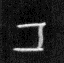

In [17]:
data[13006][-1]

In [18]:
import numpy as np

In [30]:
x = np.asarray(data[0][-1])

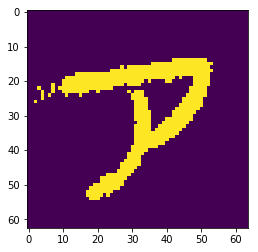

In [31]:
plt.imshow(x > 50)